In [1]:
import os
os.chdir('..')

In [2]:
from matplotlib import pyplot as plt
from src import data as dt
from src import util
from src import experiments as ex
import yaml
from src import detector_descriptor as dd
import src.keypoint_processing as kpp


In [3]:
color_map = plt.get_cmap('tab20').colors
image_set_variance = {
    'leuven': 'light',
    'bikes': 'blur',
    # 'trees': 'blur',
    # 'wall': 'viewpoint',
    'graf': 'viewpoint',
    # 'bark': 'zoom and rotation',
    'boat': 'zoom and rotation',
    'ubc': 'jpeg-compression'
}


with open(os.path.join('./', 'config.yml'), 'r') as ymlfile:
    cfg = yaml.load(ymlfile, Loader=yaml.FullLoader)
    cfg = cfg['default']

dataset_path = cfg['path']['dataset']
dataset = cfg['current_dataset']
pckl_path = cfg['path']['pckl']
pckl_name = ''.join([dataset, '_label.pckl'])
label_path = os.path.join(pckl_path, pckl_name)
labels = dt.load_data(label_path)

data_path = os.path.join(pckl_path, ''.join([dataset, '.pckl']))
image_set_name = 'leuven'
image_set_name_list = [key for key in image_set_variance.keys()]
image_set = util.get_image_set(data_path, image_set_name)
plt.rcParams["font.family"] = "Times New Roman"

# image_nums = (1, 2)
# image1 = image_set[f'{image_set_name}_img{image_nums[0]}']
# image2 = image_set[f'{image_set_name}_img{image_nums[1]}']
# # label_name = f'{image_set_name}_img{image_nums[1]}'
# # label_homography = labels[label_name]
# detector_name = 'HarrisLaplace'
# descriptor_name = 'BRISK'
# colors = ['olive', 'red', 'cyan', 'blue', 'purple', 'green', 'grey', 'orange', 'indigo', 'black']
# # plt.style.use('ggplot')

# # plt.legend()
# # plt.show()

In [4]:
def exp_repeatability_plt(image_set_name,
                          color_map,
                          data_path,
                          labels,
                          ax):
    plot_dict = dict()
    image_set = util.get_image_set(data_path, image_set_name)
    for detector in dd.all_detectors:
        # print(detector)
        plot_dict[detector] = kpp.get_repeatability_by_det(detector, image_set_name, image_set, labels)

    bar_width = 0.1
    bars = dict()

    for detector, val_dict in plot_dict.items():
        bar = list()
        for image_num, val in val_dict.items():
            bar.append(val['ratio'])
        bars[detector] = bar

    # Set position of bar on X axis
    pos = dict()
    r = list(range(len(list(bars.values())[0])))
    # pos.append(r)
    for i, detector in enumerate(bars):
        if i is 0:
            pos[detector] = r
        else:
            r = [x + bar_width for x in r]
            pos[detector] = r

    # Make the plot
    ax.grid(linewidth=1.5)
    ax.xaxis.grid(False)
    for i, detector in enumerate(bars):
        ax.bar(pos[detector], bars[detector], color=color_map[i], alpha=1, width=bar_width,
               edgecolor='white', label=detector)

    xticks_pos = list()
    xticks_labels = list()
    for i in range(len(list(pos.values())[0])):
        xticks_labels.extend([detector for detector in pos.keys()])
        for detector_name, pos_val in pos.items():
            xticks_pos.append(pos_val[i])
    
    
#     plt.xlabel('group', fontweight='bold')
#     plt.xticks([r + bar_width for r in range(len(bars))], [1,2,3,4,5])

    xticks_labels = [1,2,3,4,5]
#     xticks_pos = [r + bar_width for r in range(len(bars))], [1,2,3,4,5]
    ax.set_xticks([r + 3.5 * bar_width for r in range(len(bars['AGAST']))])
    ax.set_xticklabels(xticks_labels)

    # Rotate the tick labels and set their alignment.
#     plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#              rotation_mode="anchor", fontsize=9)

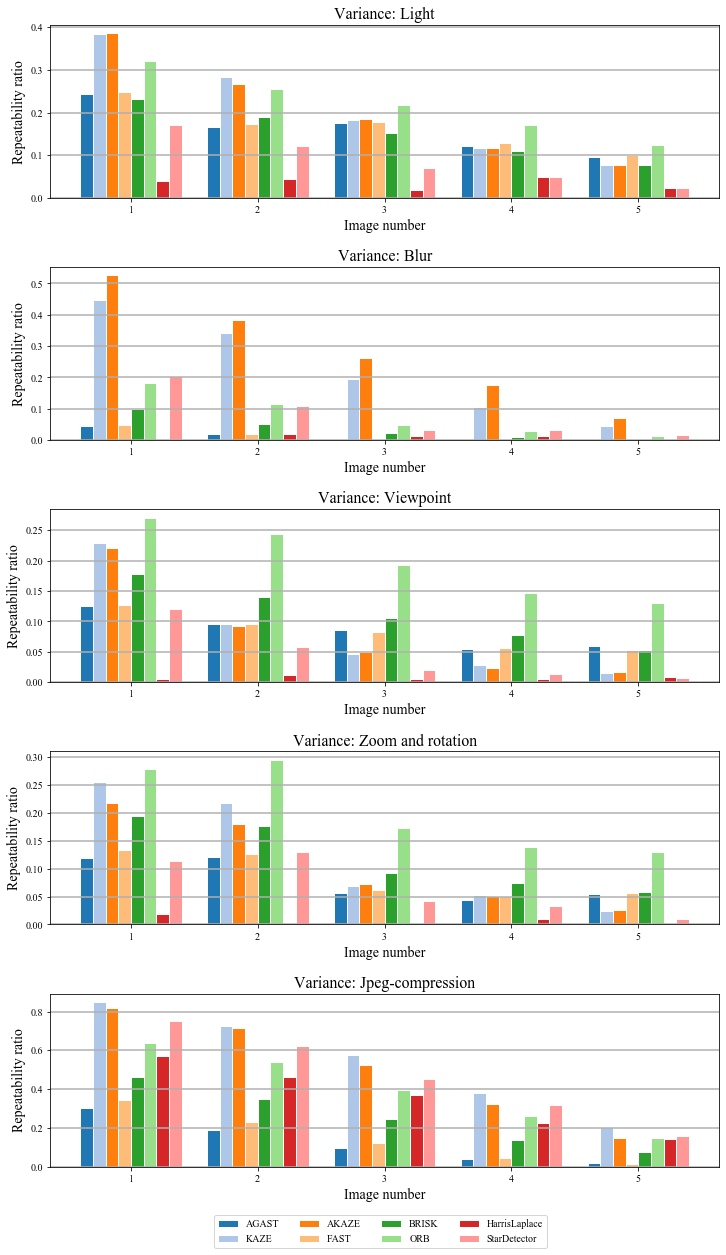

In [5]:
fig, axs = plt.subplots(len(image_set_name_list), 1, figsize=(12, len(image_set_name_list) * 4.0 + 1))

for i in range(len(image_set_name_list)):
    exp_repeatability_plt(image_set_name_list[i], color_map, data_path, labels, axs[i])

    axs[i].set_xlabel(f'Image number', fontsize=14)
    axs[i].set_ylabel('Repeatability ratio', fontsize=14)
    axs[i].set_title(f'Variance: {image_set_variance[image_set_name_list[i]].capitalize()}', fontsize=16)

handles, labels = axs[0].get_legend_handles_labels()
# handles2, labels2 = axs2[0].get_legend_handles_labels()
plt.legend(handles, labels, bbox_to_anchor=(0.75, -0.25), ncol=4)
fig.subplots_adjust(hspace=0.4)
# plt.show()

# plt.grid()
plt.show()